## Introducción 

Vamos a analizar un dataset que contiene respuestas de personas que fueron sometidas a una encuesta sobre la saga Star Wars.

A los participantes se les pidió responder a ciertas preguntas sobre la saga como:

- Película favorita
- Personajes favoritos
- Si les gustan temas relacionados con el espacio exterior

Además, el dataset contiene datos personales generales (anónimos) sobre los participantes como rango de edad, lugar de residencia, nivel de ingresos o tipo de formación.

Estudiaremos las preferencias de los participantes y visualizaremos los resultados.

### Importación de librerías y configuración del notebook

Vamos a importar las librerías que utilizaremos para realizar los análisis y centraremos los outputs.

Módulos que vamos a utilizar:

- **Manipulación de DataFrames:** utilizaremos Pandas y NumPy.
- **Construcción de gráficos:** utilizaremos matplotlib y Seaborn

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-dark')

# pandas mostrará todas las columnas si lo deseamos
pd.set_option('display.max_columns', None)

# Evitamos el copyWarning de pandas
pd.options.mode.chained_assignment = None 

# Mostramos gráficos de matplotlib inline
%matplotlib inline

# Centramos los outputs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    margin:auto;
}
.prompt 
    display:none;
}
}
</style>
""")

### Lectura del dataset

El dataset que vamos a utilizar se llama *StarWars.csv*, está en formato CSV, e inmediatamente después de la lectura veremos su estructura para familiarizarnos con él y ver cómo está construido:

In [2]:
# Lectura del dataset 'StarWars.csv'
star_wars = pd.read_csv('StarWars.csv')

### Visualización del DataFrame

Vamos a visualizar el aspecto del DataFrame:

In [3]:
# Mostramos el aspecto del DataFrame
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?��,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return 

### Información del dataset

El DataFrame es básicamente una encuesta sobre películas de Star Wars. Contiene la siguiente información:

- **RespondentID** ID del encuestado
- **Have you seen any of the 6 films in the Star Wars franchise?** Pregunta al encuestado si ha visto alguna de las seis películas de Star Wars
- **Do you consider yourself to be a fan of the Star Wars film franchise?** Pregunta al encuestado si es un fan de la saga Star Wars
- **Which of the following Star Wars films have you seen? Please select all that apply.** Tanto esta como las siguientes cinco columnas se refieren a cada una de las películas de Star Wars (la película concreta está indicada en la primera fila, que actúa como índice). Si el encuestado las ha visto, el nombre de la película será el valor de la fila correspondiente. Si no la ha visto o no hay información, hay un valor nulo.
- **Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.** Piden al encuestado puntuar las películas según su preferencia personal. De forma similar a las anteriores columnas, esta columna y las cinco siguientes se refieren cada una a una película de Star Wars. Contienen un número del 1 al 6, siendo 1 la mayor valoración y 6 la menor.
- **Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.** Piden al encuestado una opinión sobre ciertos personajes de la saga Star Wars. Son 14 columnas en total (ésta y las 13 siguientes)
- **Which character shot first?** Una pregunta para los fans
- **Are you familiar with the Expanded Universe?** Se le pregunta al encuestado si tiene conocimientos del espacio
- **Do you consider yourself to be a fan of the Expanded Universe?��** Se le pregunta al encuestado si le gustan temas relacionados con el espacio
- **Do you consider yourself to be a fan of the Star Trek franchise?** Se le pregunta al encuestado si es fan de la saga Star Trek
- **Gender** Género del encuestado
- **Age** Rango de edad del encuestado
- **Household Income** Rango salarial del domicilio del encuestado
- **Education** Formación del encuestado
- **Location (Census Region)** Lugar de residencia del encuestado

In [4]:
# Vamos a ver todas las columnas del DataFrame
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Tratamiento de columnas y valores

Hay columnas que contienen nombres o valores con los que trabajar resulta tedioso. Vamos a ir limpiando estos valores y cambiándolos por otros más sencillos de manejar.

Las columnas *Have you seen any of the 6 films in the Star Wars franchise?* y *Do you consider yourself to be a fan of the Star Wars film franchise?* solo tienen tres valores: Yes, No o o un valor nulo:

In [5]:
# Valores de las columnnas
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes         936
No          250
Response      1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes         552
NaN         350
No          284
Response      1
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

- *Have you seen any of the 6 films in the Star Wars franchise?* solo contiene Yes o No, porque Response es el valor de la primera fila, que en este DataFrame funciona como un índice. No contiene valores nulos.

- *Do you consider yourself to be a fan of the Star Wars film franchise?* tiene prácticamente 1/3 de valores nulos

De momento lo que vamos a hacer es mapear estas dos columnas y vamos a convertir los valores Yes y No a booleanos True o False, así será más sencillo trabajar con las columnas en el futuro.

In [7]:
# Transformamos los valores de las columnas
yes_no = {
    "Yes":True,
    "No":False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] =\
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] =\
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [8]:
# Comprobamos los cambios que hemos realizado
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
NaN        1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [9]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      351
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

### Películas vistas

Vamos a cambiar tanto el nombre de las columnas que se refieren a las películas vistas por el encuestado como a los valores de las columnas.

Las columnas referidas a las películas vistas por el encuestado son:

- Which of the following Star Wars films have you seen? Please select all that apply.
- Unnamed: 4
- Unnamed: 5
- Unnamed: 6
- Unnamed: 7
- Unnamed: 8

Como ya hemos comentado, la primera fila actúa como índice, y tal y como está ahora mismo el DataFrame, los valores de éstas columnas son:

- **Si el encuestado ha visto la película:** el nombre de la película
- **Si no la ha visto o no hay información:** un valor nulo

Asumiremos en el segundo caso que no la ha visto y que tenemos toda la información.

Vamos a convertir todos los valores anteriores de la siguiente manera:

In [10]:
# Convertimos los nombres de las columnas
new_names = {
    'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
    'Unnamed: 4':'seen_2', 
    'Unnamed: 5':'seen_3', 
    'Unnamed: 6':'seen_4', 
    'Unnamed: 7':'seen_5', 
    'Unnamed: 8':'seen_6',    
}
star_wars = star_wars.rename(columns=new_names)

In [11]:
# Comprobamos los cambios
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?��',
       'Do yo

In [12]:
# Convertimos ahora los valores de las columnas
new_1 = {'Star Wars: Episode I  The Phantom Menace' : True, np.NaN : False}
new_2 = {'Star Wars: Episode II  Attack of the Clones' : True, np.NaN : False}
new_3 = {'Star Wars: Episode III  Revenge of the Sith' : True, np.NaN : False}
new_4 = {'Star Wars: Episode IV  A New Hope' : True, np.NaN : False}
new_5 = {'Star Wars: Episode V The Empire Strikes Back' : True, np.NaN : False}
new_6 = {'Star Wars: Episode VI Return of the Jedi' : True, np.NaN : False}

star_wars['seen_1'] = star_wars['seen_1'].map(new_1)
star_wars['seen_2'] = star_wars['seen_2'].map(new_2)
star_wars['seen_3'] = star_wars['seen_3'].map(new_3)
star_wars['seen_4'] = star_wars['seen_4'].map(new_4)
star_wars['seen_5'] = star_wars['seen_5'].map(new_5)
star_wars['seen_6'] = star_wars['seen_6'].map(new_6)    

### Ránking de películas del encuestado

Las columnas que se refieren al ránking personal del encuestado son:

- Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
- Unnamed: 10
- Unnamed: 11
- Unnamed: 12
- Unnamed: 13
- Unnamed: 14

Cada una de las columnas se refiere a una película, indicada en la primera fila (la que actúa como índice).

Vamos a renombrar estos nombres como *ranking_1*, *ranking_2*, etc.

Además, vamos a comprobar si los valores (del 1 al 6) de la columna son de tipo numérico. Si no lo son, los convertiremos.

In [13]:
# Primero renombramos las columnas
rank_rename = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1', 
    'Unnamed: 10':'ranking_2', 
    'Unnamed: 11':'ranking_3', 
    'Unnamed: 12':'ranking_4', 
    'Unnamed: 13':'ranking_5', 
    'Unnamed: 14':'ranking_6', 
}

star_wars = star_wars.rename(columns=rank_rename)

In [14]:
# Comprobamos los cambios
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?��',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
 

In [15]:
# Comprobamos si el tipo de datos de las columnas es numérico
star_wars['ranking_1'].dtype

dtype('O')

In [16]:
# Como no es numérico, lo convertimos

cols = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']

for col in cols:
        star_wars[col][1:] = pd.to_numeric(star_wars[col][1:],errors='coerce')

In [17]:
# Comprobamos que todo está correcto
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?��,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,NaN,True,True,True,True,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


### La película más valorada

Como ya tenemos los ránkings en formato numérico, podemos saber fácilmente cuales son las películas favoritas de los encuestados.

Hay que recordar que en este caso, menos es mejor (las valoraciones van de 1 a 6, siendo 1 la mayor valoración y 6 la peor):

In [18]:
# Seleccionamos las filas de los rankings
rankings = star_wars.loc[1:,'ranking_1':'ranking_6']

In [19]:
rankings

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
...,...,...,...,...,...,...
1182,5.0,4.0,6.0,3.0,2.0,1.0
1183,4.0,5.0,6.0,2.0,3.0,1.0
1184,NaN,NaN,NaN,NaN,NaN,NaN
1185,4.0,3.0,6.0,5.0,2.0,1.0


In [20]:
rankings_mean = rankings.mean()

In [21]:
rankings_mean

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

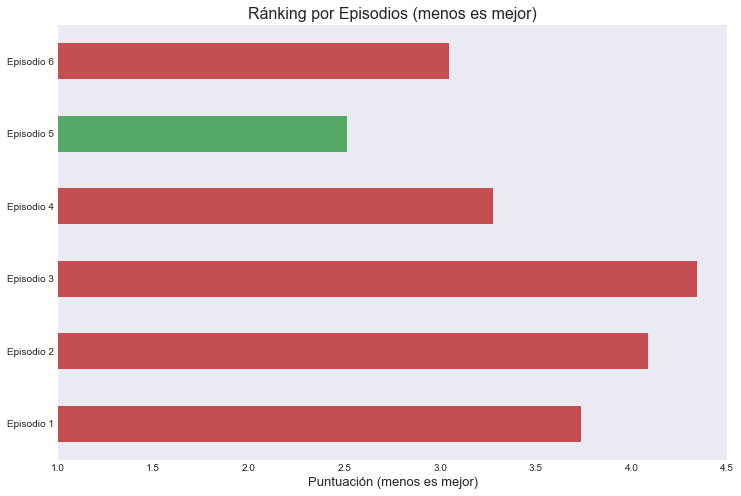

In [22]:
# Graficamos los resultados

# Paleta de colores
colors_deep = sns.color_palette('deep')
# Cambiamos los índices
rankings_mean.index = rankings_mean.index.str.replace('ranking_', 'Episodio ')

# Plot
color_map = [colors_deep[3], colors_deep[3], colors_deep[3], colors_deep[3], colors_deep[2], colors_deep[3]]
plt.figure(figsize=(12,8))
rankings_mean.plot(kind='barh', color=color_map, xlim=(1,4.5))
plt.title('Ránking por Episodios (menos es mejor)', fontsize=16)
plt.xlabel('Puntuación (menos es mejor)', fontsize=13)
plt.show()

**Películas favoritas de los encuestados (en orden de mayor a menor):**

- Episodio V
- Episodio VI
- Episodio IV
- Episodio I
- Episodio II
- Episodio III

### La película más vista

Vamos a graficar los resultados de las películas más vistas:

In [23]:
# Número de visualizaciones de cada película
visualizations = star_wars[star_wars.columns[3:9]].sum(axis=0)
visualizations

seen_1    674
seen_2    572
seen_3    551
seen_4    608
seen_5    759
seen_6    739
dtype: int64

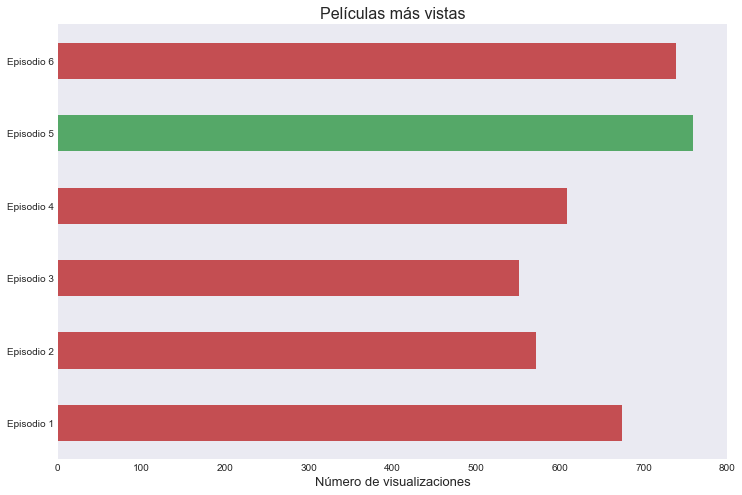

In [24]:
# Graficamos los resultados

# Paleta de colores
colors_deep = sns.color_palette('deep')
# Cambiamos los índices
visualizations.index = rankings_mean.index.str.replace('seen_', 'Episodio ')

# Plot
color_map = [colors_deep[3], colors_deep[3], colors_deep[3], colors_deep[3], colors_deep[2], colors_deep[3]]
plt.figure(figsize=(12,8))
visualizations.plot(kind='barh', color=color_map, xlim=(0,800))
plt.title('Películas más vistas', fontsize=16)
plt.xlabel('Número de visualizaciones', fontsize=13)
plt.show()

**Las películas más vistas por los encuestados fueron (en orden de mayor a menor):**

- Episodio V   : 759 visualizaciones
- Episodio VI  : 739 visualizaciones
- Episodio I   : 674 visualizaciones
- Episodio IV  : 608 visualizaciones
- Episodio II  : 572 visualizaciones
- Episodio III : 551 visualizaciones

### Películas más vistas por zona de residencia de los encuestados

Vamos a mostrar las películas más vistas de los encuestados según su zona de residencia.

Para ello, agruparemos el DataFrame por localizaciones - columna *Location (Census Region)*:

In [25]:
# Agrupamos por localizaciones
loc_rankings = star_wars[1:].groupby('Location (Census Region)')

In [26]:
# Calculamos las medias
loc_rankings = loc_rankings.agg(np.mean)

In [27]:
loc_rankings = loc_rankings.drop(['RespondentID'], axis=1)

In [28]:
loc_rankings

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Location (Census Region),,,,,,
East North Central,0.563536,0.491713,0.491713,0.524862,0.707182,0.668508
East South Central,0.631579,0.552632,0.552632,0.710526,0.815789,0.763158
Middle Atlantic,0.647541,0.565574,0.573770,0.622951,0.680328,0.696721
Mountain,0.721519,0.594937,0.582278,0.683544,0.772152,0.746835
New England,0.666667,0.586667,0.573333,0.640000,0.733333,0.720000
Pacific,0.685714,0.565714,0.525714,0.600000,0.702857,0.708571
South Atlantic,0.611765,0.482353,0.464706,0.547059,0.735294,0.705882
West North Central,0.655914,0.548387,0.526882,0.526882,0.720430,0.677419
West South Central,0.563636,0.527273,0.454545,0.445455,0.636364,0.627273


In [29]:
# Renombramos las columnas
def ren_col(df, string, first_col, last_col):
    """
    Renombra columnas en base a un string y a 
    un número de inicio y otro de final
    """
    for i, col in enumerate(df[df.columns[first_col:last_col]]):
        df.rename({col: string + str(i+1)},
                         axis=1, 
                         inplace=True)
        
# Aplicamos la función
ren_col(loc_rankings, 'Episodio ', 0, 6)

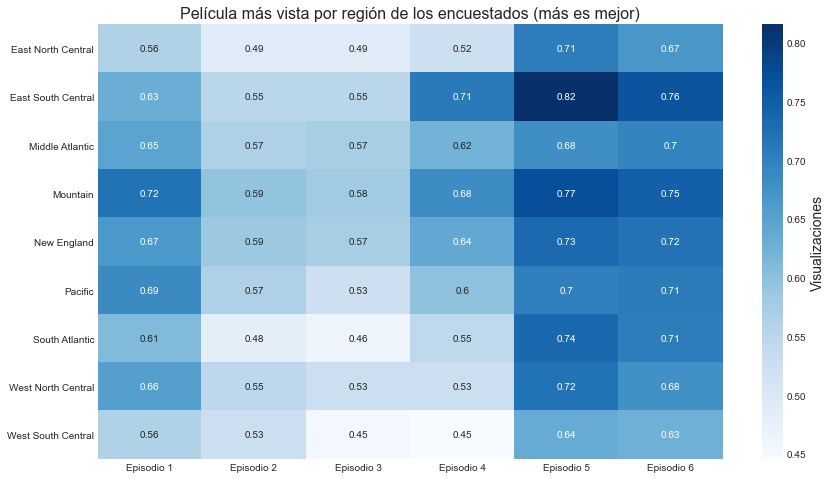

In [30]:
# Graficamos los resultados 
plt.figure(figsize=(14,8))
ax = sns.heatmap(loc_rankings, cmap='Blues', annot=True, cbar_kws={'label': 'Visualizaciones'})
ax.figure.axes[-1].yaxis.label.set_size(14)
plt.title('Película más vista por región de los encuestados (más es mejor)', fontsize=16)
plt.ylabel('')
plt.show()

El Episodio VI es la película más vista por región de procedencia de los encuestados. 

Solo vemos dos excepciones, y es que el Episodio VI fue la película más vista por los encuestados en las regiones de Middle Atlantic y Pacific.

### Películas más valoradas por región

De la misma manera que antes, graficamos las preferencias de películas por región:

In [31]:
for column in rankings.columns:
    rankings[column] = pd.to_numeric(rankings[column])
    
rankings['Location'] = star_wars['Location (Census Region)']

In [32]:
rankings_groups = rankings.groupby('Location')

In [33]:
rankings_groups_means = rankings_groups.mean()

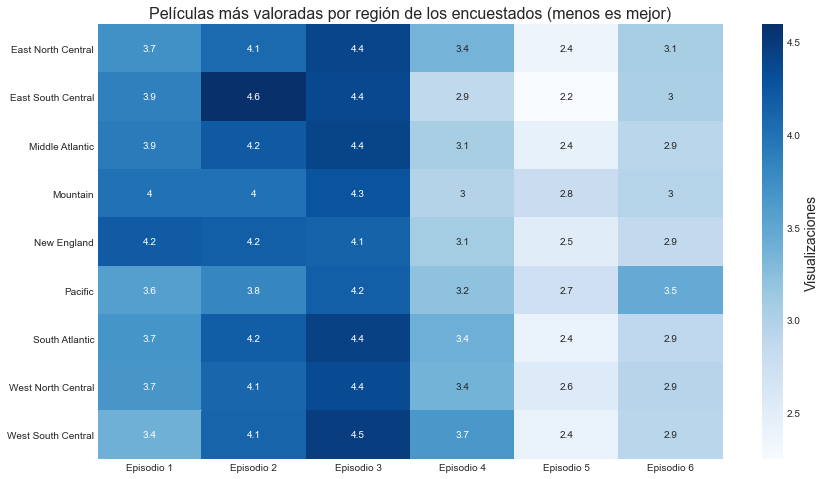

In [34]:
ren_col(rankings_groups_means, 'Episodio ', 0, 6)
# Graficamos los resultados 
plt.figure(figsize=(14,8))
ax = sns.heatmap(rankings_groups_means, cmap='Blues', annot=True, cbar_kws={'label': 'Visualizaciones'})
ax.figure.axes[-1].yaxis.label.set_size(14)
plt.title('Películas más valoradas por región de los encuestados (menos es mejor)', fontsize=16)
plt.ylabel('')
plt.show()

La mejor película según los encuestados sigue siendo el Episodio V. Esto no cambia en ninguna región.

### Películas más valoradas por los fans

Vamos a ver las películas mejor valoradas por los fans de la saga y por los que no se consideran fans:

In [35]:
# Eliminamos la fila Location
rankings_fans = rankings.drop('Location', axis=1)

In [36]:
# Creamos la fila Fan
rankings_fans['Fan'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']

In [37]:
# Agrupamos
rankings_fans = rankings_fans.groupby('Fan')

In [38]:
# Medias
rankings_fans_mean = rankings_fans.mean()

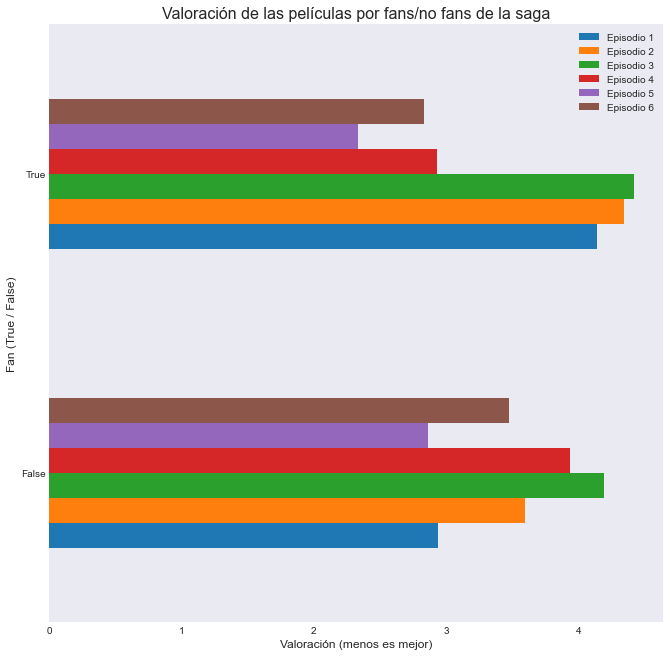

In [39]:
ren_col(rankings_fans_mean, 'Episodio ', 0, 6)

# Graficamos
rankings_fans_mean.plot(kind='barh', figsize=(11,11))
plt.ylabel('Fan (True / False)', fontsize=12)
plt.xlabel('Valoración (menos es mejor)', fontsize=12)
plt.title('Valoración de las películas por fans/no fans de la saga', fontsize = 16)
plt.show()

**Ránking según los fans:**
- Episodio V
- Episodio VI
- Episodio IV
- Episodio I
- Episodio II
- Episodio III

**Ránking según los no-fans:**
- Episodio V
- Episodio I
- Episodio VI
- Episodio II
- Episodio IV
- Episodio III

### Ránkings de películas según los fans de Star Trek

Vamos a ver los resultados para las personas que se consideran fans de la saga Star Trek:

In [40]:
# Construimos el DF star_trek
star_trek = rankings.drop('Location',axis=1)

In [41]:
star_trek['ST_Fan'] = star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] 

In [42]:
star_trek_group = star_trek.groupby('ST_Fan')

In [43]:
star_trek_means = star_trek_group.mean()

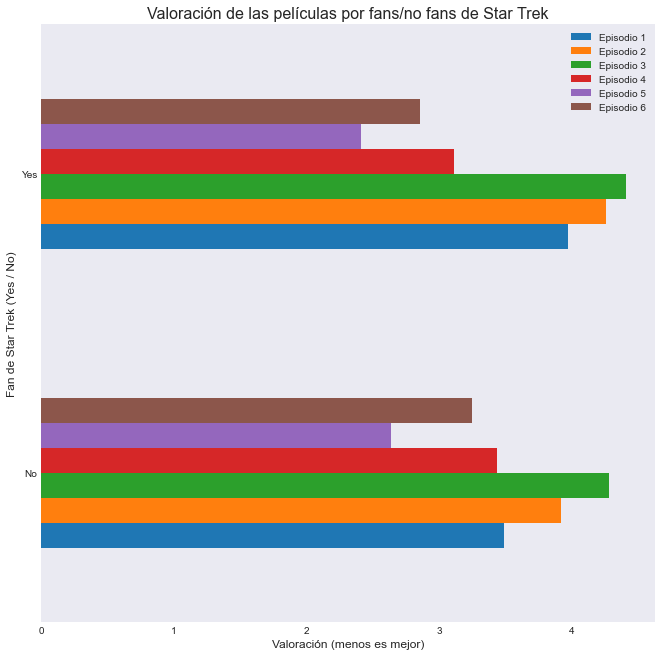

In [44]:
ren_col(star_trek_means, 'Episodio ', 0, 6)

# Graficamos los resultados
star_trek_means.plot(kind='barh', figsize=(11,11))
plt.ylabel('Fan de Star Trek (Yes / No)', fontsize=12)
plt.xlabel('Valoración (menos es mejor)', fontsize=12)
plt.title('Valoración de las películas por fans/no fans de Star Trek', fontsize = 16)
plt.show()

Aquí los resultados son los mismos tanto para los fans de Star Trek como para los no-fans.
- Episodio V
- Episodio VI
- Episodio IV
- Episodio I
- Episodio II
- Episodio III

### Ránkings por género de los encuestados

Vamos a ver las películas favoritas según el género de los participantes en las encuestas:

In [45]:
# Construimos el DataFrame generos y agrupamos
generos = star_trek.drop('ST_Fan', axis=1)
generos['gender'] = star_wars['Gender']
generos_group = generos.groupby('gender')

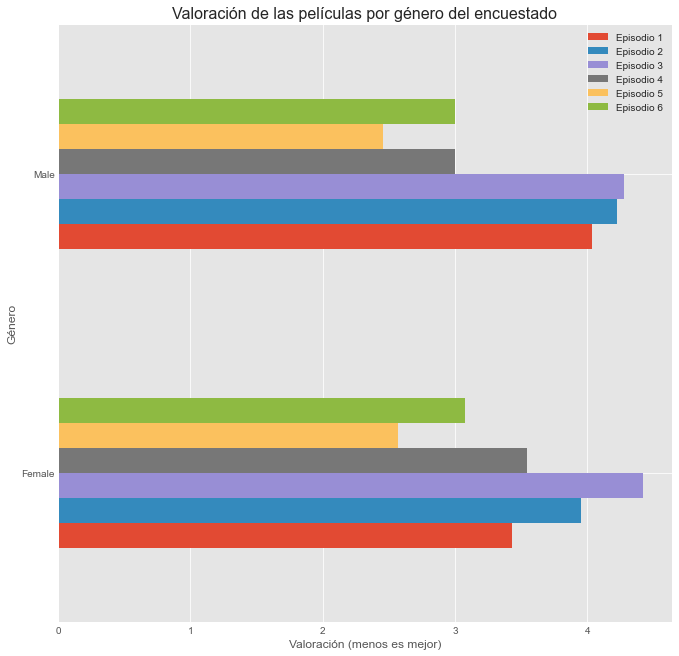

In [46]:
# Graficamos
generos_mean = generos_group.mean()

ren_col(generos_mean, 'Episodio ', 0, 6)

plt.style.use('ggplot')
generos_mean.plot(kind='barh', figsize=(11,11))
plt.ylabel('Género', fontsize=12)
plt.xlabel('Valoración (menos es mejor)', fontsize=12)
plt.title('Valoración de las películas por género del encuestado', fontsize = 16)
plt.show()

Los hombres le dan la misma puntuación a los Episodios IV y VI (tras el Episodio V, que sigue siendo el favorito). Los tres menos populares, con puntuaciones muy similares, son el I, II y III.

Las mujeres por su parte siguen eligiendo al Episodio VI como el mejor de la saga, seguido del VI y el IV. Las tres últimas posiciones, al igual que los hombres, son para el I, II y III.

### Ránkings según estudios de los encuestados

Vamos a agrupar ahora por nivel de estudios:

In [49]:
# Creamos el DF
estudios = star_trek.drop('ST_Fan', axis=1)
estudios['Education'] = star_wars['Education']
estudios_groups = estudios.groupby('Education')
estudios_mean = estudios_groups.mean()

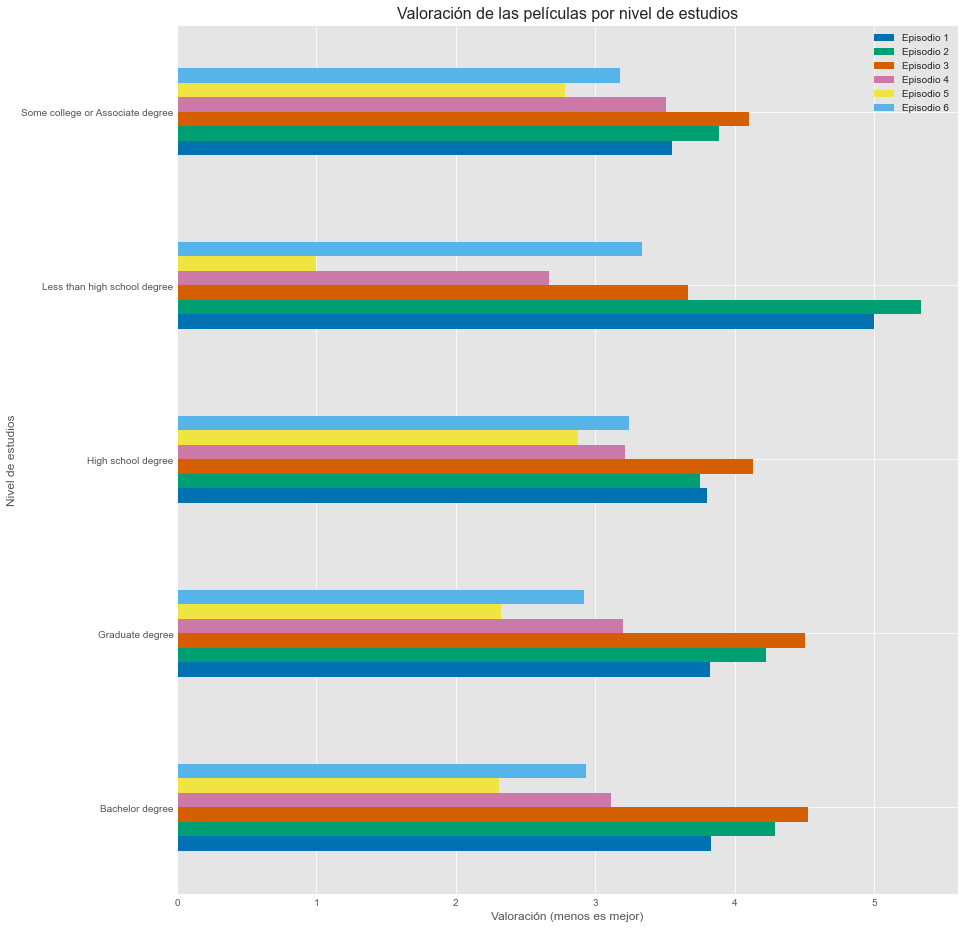

In [57]:
ren_col(estudios_mean, 'Episodio ', 0, 6)

# Graficamos los resultados
plt.style.use('seaborn-colorblind')
estudios_mean.plot(kind='barh', figsize=(14,16))
plt.ylabel('Nivel de estudios', fontsize=12)
plt.xlabel('Valoración (menos es mejor)', fontsize=12)
plt.title('Valoración de las películas por nivel de estudios', fontsize = 16)
plt.show()

En todos los casos el Episodio V sigue siendo la mejor valorada, pero especialmente en el caso de *Less than high school degree*, que destaca por mucho sobre las demás.

## Conclusiones finales

Hemos visto que existe unanimidad total entre los encuestados: el Episodio V de la saga Star Wars es la película favorita de todos los colectivos (fans, no-fans, fans de Star Trek, hombres, mujeres...).

Concretamente, los resultados son los siguientes:

**Películas favoritas de los encuestados:**

- 1) Episodio V
- 2) Episodio VI
- 3) Episodio IV
- 4) Episodio I
- 5) Episodio II
- 6) Episodio III

**Películas más vistas por los encuestados:**

- 1) Episodio V   : 759 visualizaciones
- 2) Episodio VI  : 739 visualizaciones
- 3) Episodio I   : 674 visualizaciones
- 4) Episodio IV  : 608 visualizaciones
- 5) Episodio II  : 572 visualizaciones
- 6) Episodio III : 551 visualizaciones

**Ránking de películas según los fans de Star Wars:**
- 1) Episodio V
- 2) Episodio VI
- 3) Episodio IV
- 4) Episodio I
- 5) Episodio II
- 6) Episodio III

**Ránking de películas según los no-fans de Star Wars:**
- 1) Episodio V
- 2) Episodio I
- 3) Episodio VI
- 4) Episodio II
- 5) Episodio IV
- 6) Episodio III

**Ránking de películas según hombres/mujeres:**

Unanimidad entre hombres y mujeres, salvo que en el grupo de los hombres la segunda posición está muy igualada. Las mejores películas son, según ambos grupos:
- 1) Episodio V
- 2) Episodio VI
- 3) Episodio IV
- 4) Episodio I
- 5) Episodio II
- 6) Episodio III

**La mejor película por nivel de estudios:**

Unanimidad aquí también. La mejor película de la saga es el Episodio V.

**La peor película por nivel de estudios:**

El Episodio III es la peor en todos los casos salvo para los encuestados con un nivel de estudios inferior a *high school degree*, que eligieron el Episodio II como la peor película de la saga.